In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
from Bio.Phylo._io import parse
from Bio.Phylo.BaseTree import Tree as BioTree

from src.datasets.load_trees import load_trees_from_file
from src.utils.tree_utils import get_taxa_names
from src.utils.tree_utils import get_tree_height
from src.distribution_analysis.process_tree import get_observed_nodes, get_clade_split_df

In [3]:
import warnings
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")

In [9]:
REFERENCE_TREE_FILE = Path("data/thinned_mcmc_runs/yule-10_34.trees")
SAMPLE_TREES_FILE = Path("data/distribution_data/yule-10_34_sampled-trees_gamma-mu-sigma.trees")
NUM_TAXA = 10

In [10]:
ref_trees = load_trees_from_file(REFERENCE_TREE_FILE)

In [12]:
sample_trees = load_trees_from_file(SAMPLE_TREES_FILE)
sample_trees = [
    t for t in sample_trees if get_tree_height(t) < 100
]

In [13]:
taxa_names = get_taxa_names(ref_trees[0])

In [14]:
_, sample_clade_splits = get_observed_nodes(sample_trees, taxa_names)
_, ref_clade_splits = get_observed_nodes(ref_trees, taxa_names)

sample_branches = get_clade_split_df(sample_clade_splits)
ref_branches = get_clade_split_df(ref_clade_splits)

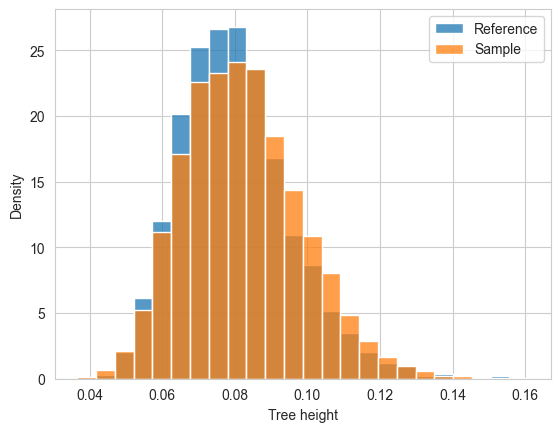

In [15]:
from random import sample
import numpy as np

NUM_PAIRS = 5_000
SAMPLE_SIZE = 5_000
NUM_BINS = 25


ref_tree_heights = [
    get_tree_height(tree)
    for tree in sample(ref_trees, min(SAMPLE_SIZE, len(ref_trees)))
]
sample_tree_heights = [
    get_tree_height(tree)
    for tree in sample(sample_trees, min(SAMPLE_SIZE, len(sample_trees)))
]


def _get_bins(items: list[float]):
    min_item = np.percentile(items, 0.001)
    max_item = np.percentile(items, 99.999)
    return np.linspace(min_item, max_item, NUM_BINS)

bins = _get_bins(ref_tree_heights)

sns.histplot(ref_tree_heights, stat="density", label="Reference", bins=bins)
sns.histplot(sample_tree_heights, stat="density", label="Sample", bins=bins)

plt.xlabel("Tree height")
plt.legend(loc="upper right")

0000000001||0000000010


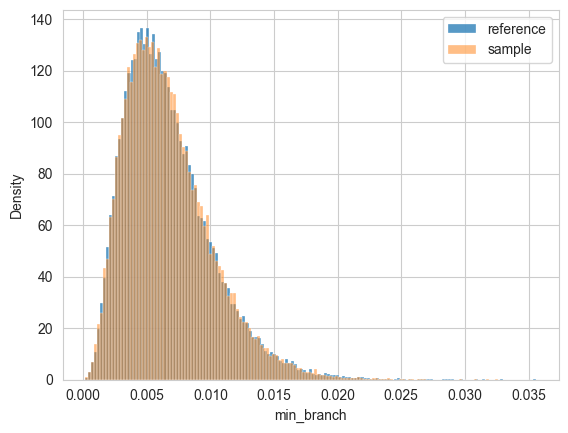

0000000011||1111111100


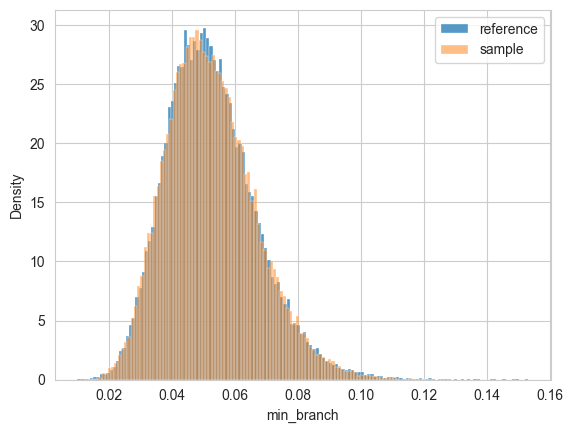

0001000000||0010000000


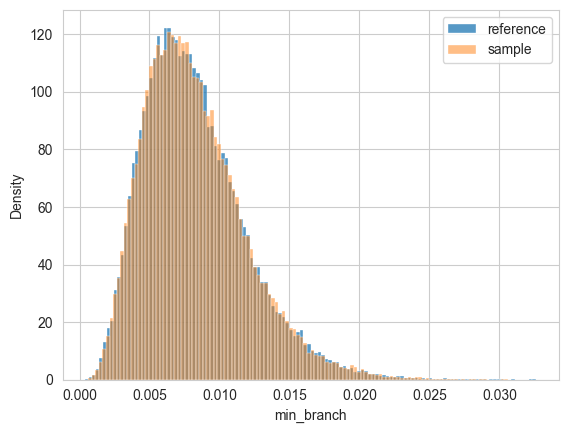

0100000000||1000000000


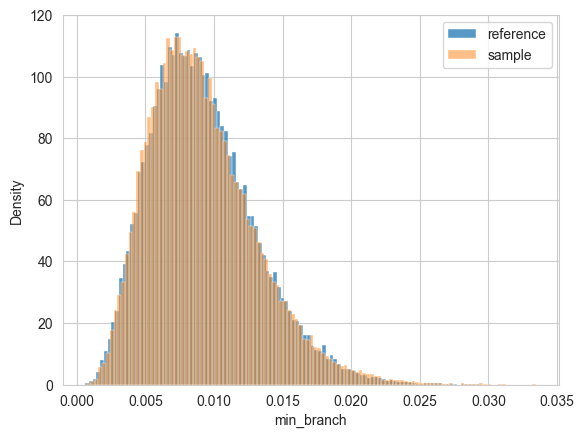

0011000000||1100000000


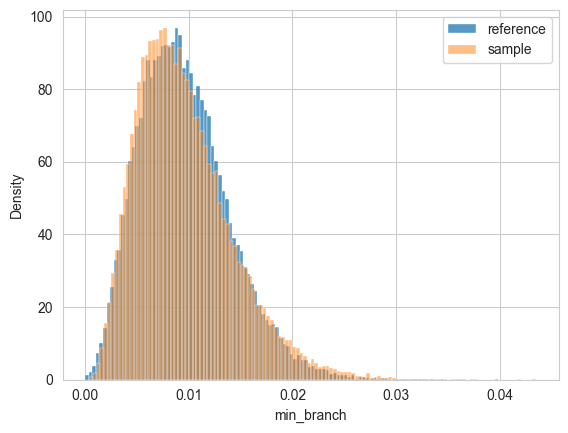

0000111100||1111000000


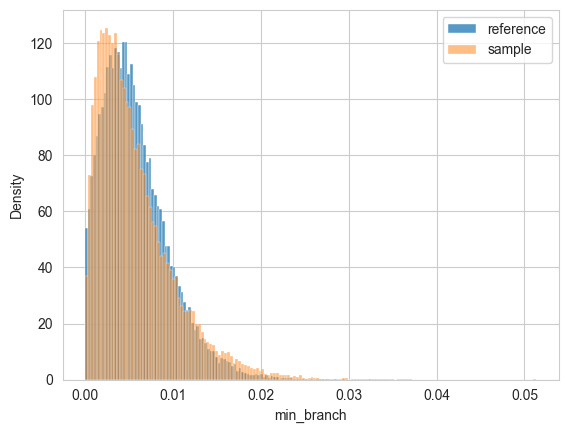

0000010000||0000001000


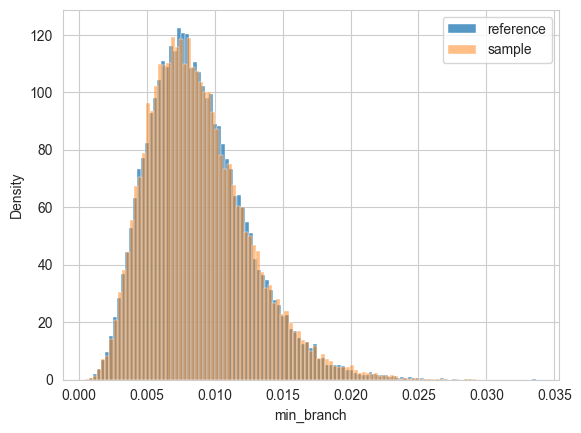

0000011100||0000100000


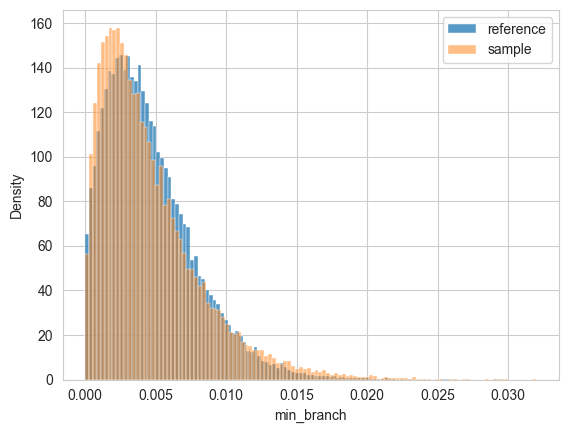

0000000100||0000011000


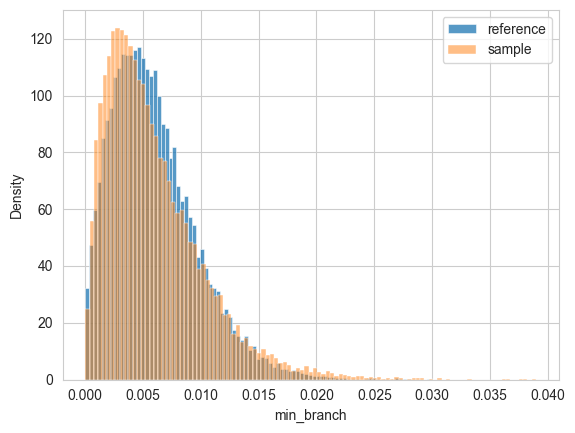

0000000100||0000001000


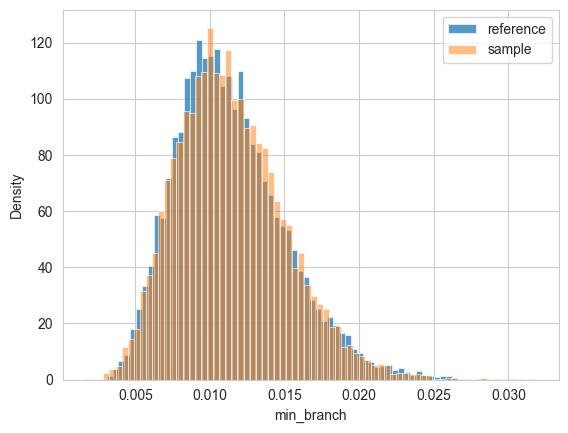

0000001100||0000010000


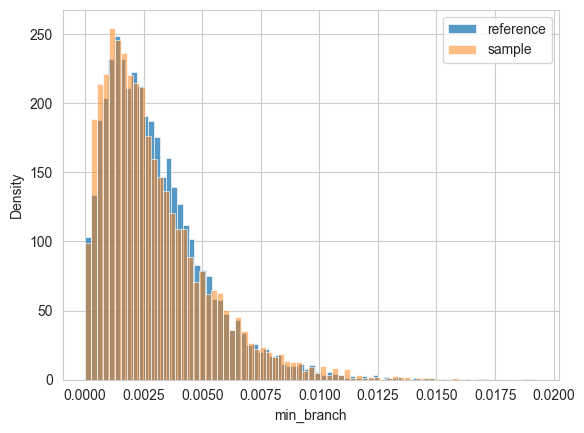

1100111100||0011000000


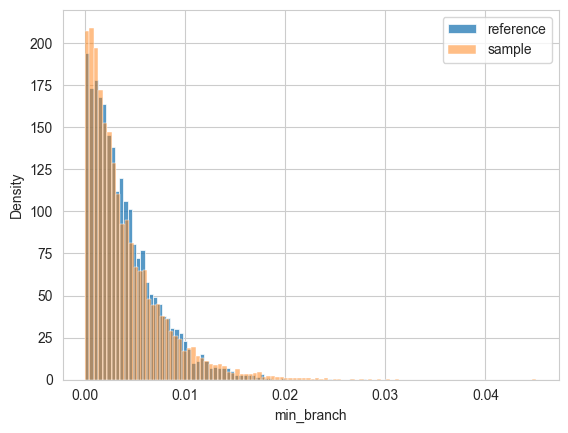

0000111100||1100000000


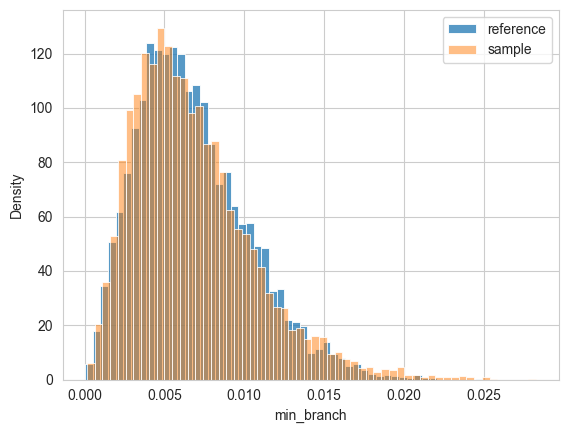

0000000100||0000111000


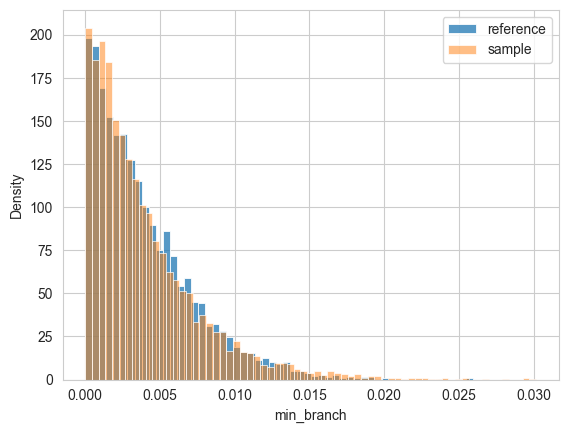

0000011000||0000100000


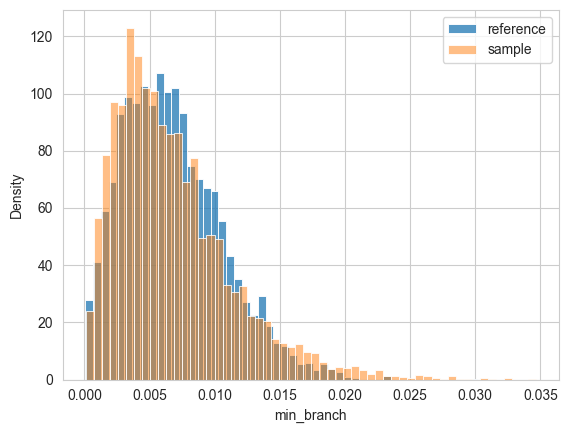

0000000100||0000100000


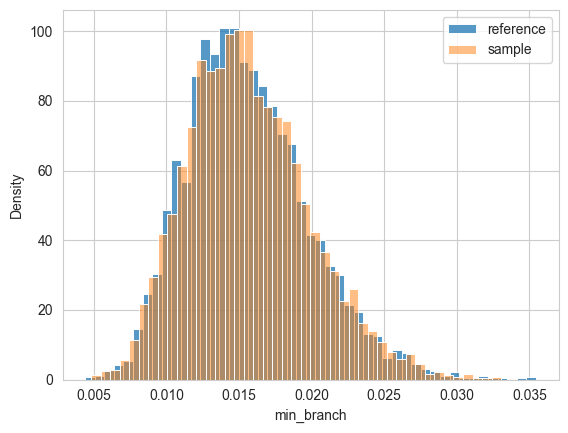

0000100100||0000011000


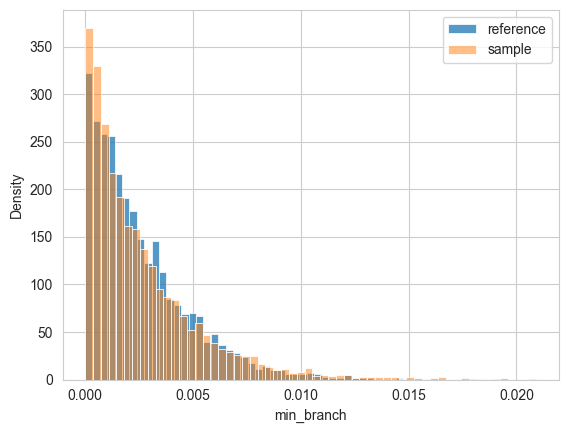

1111000000||0000100000


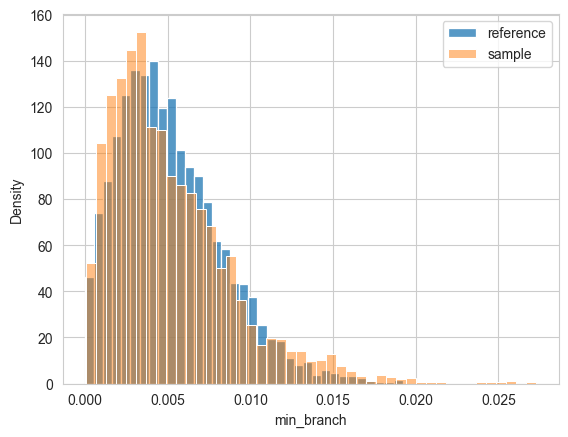

0011111100||1100000000


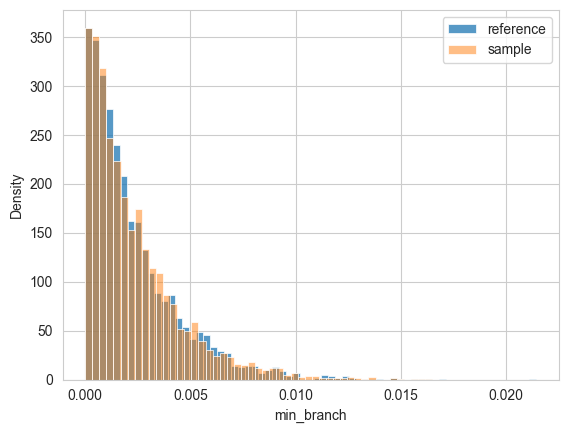

0000111100||0011000000


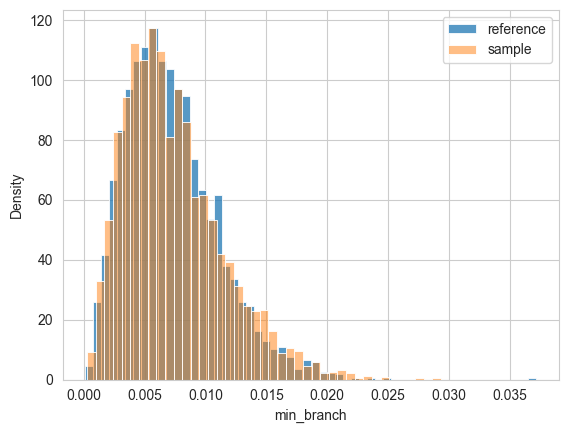

In [16]:
from collections import Counter

for clade_split, _ in Counter(ref_branches.clade_split).most_common(20):
    print(clade_split)
    
    sns.histplot(
        ref_branches[ref_branches.clade_split == clade_split], 
        x="min_branch", 
        label="reference",
        stat="density",
    )
    sns.histplot(
        sample_branches[sample_branches.clade_split == clade_split], 
        x="min_branch", 
        label="sample",
        stat="density",
        alpha=0.5,
    )

    plt.legend(loc="upper right")
    plt.show()

